In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [3]:
df.columns

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label', 'proto_code',
       'service_code', 'state_code'],
      dtype='object')

In [4]:
df['proto'].unique()

KeyError: 'proto'

In [76]:
protocol_list = ['udp', 'arp', 'tcp', 'igmp', 'ospf', 'sctp', 'gre', 'ggp', 'ip',
       'ipnip', 'st2', 'argus', 'chaos', 'egp', 'emcon', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'trunk-2',
       'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'netblt', 'mfe-nsp',
       'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp', 'tp++', 'ipv6',
       'sdrp', 'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp', 'rvd',
       'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any', 'ipv6-opts',
       'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn',
       'pvp', 'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'vines',
       'nsfnet-igp', 'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp',
       'ax.25', 'ipip', 'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp',
       'ifmp', 'pnni', 'qnx', 'scps', 'cbt', 'bbn-rcc', 'igp', 'bna',
       'swipe', 'visa', 'ipcv', 'cphb', 'iso-tp4', 'wb-expak', 'sep',
       'secure-vmtp', 'xtp', 'il', 'rsvp', 'unas', 'fc', 'iso-ip',
       'etherip', 'pim', 'aris', 'a/n', 'ipcomp', 'snp', 'compaq-peer',
       'ipx-n-ip', 'pgm', 'vrrp', 'l2tp', 'zero', 'ddx', 'iatp', 'stp',
       'srp', 'uti', 'sm', 'smp', 'isis', 'ptp', 'fire', 'crtp', 'crudp',
       'sccopmce', 'iplt', 'pipe', 'sps', 'ib']

# Create a dictionary mapping protocol names to numeric values
protocol_mapping = {protocol: index + 1 for index, protocol in enumerate(protocol_list)}

# Convert protocol names to numeric values in the DataFrame
df['proto_code'] = df['proto'].map(protocol_mapping)
df_test['proto_code'] = df_test['proto'].map(protocol_mapping)

In [77]:
df['service'].unique()

array(['-', 'http', 'ftp', 'ftp-data', 'smtp', 'pop3', 'dns', 'snmp',
       'ssl', 'dhcp', 'irc', 'radius', 'ssh'], dtype=object)

In [78]:
service_list = ['-', 'http', 'ftp', 'ftp-data', 'smtp', 'pop3', 'dns', 'snmp',
       'ssl', 'dhcp', 'irc', 'radius', 'ssh']

service_mapping = {service: index + 1 for index, service in enumerate(service_list)}

df['service_code'] = df['service'].map(service_mapping)
df_test['service_code'] = df_test['service'].map(service_mapping)

In [79]:
df['service_code'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [80]:
df['state'].unique()

array(['INT', 'FIN', 'REQ', 'ACC', 'CON', 'RST', 'CLO'], dtype=object)

In [81]:
state_list = ['INT', 'FIN', 'REQ', 'ACC', 'CON', 'RST', 'CLO']

state_mapping = {state: index + 1 for index, state in enumerate(state_list)}

df['state_code'] = df['state'].map(state_mapping)
df_test['state_code'] = df_test['state'].map(state_mapping)

In [82]:
df['attack_cat'].unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [83]:
attack_list = ['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic']

attack_mapping = {attack: index + 1 for index, attack in enumerate(attack_list)}

df['attack_code'] = df['attack_cat'].map(attack_mapping)
df_test['attack_code'] = df_test['attack_cat'].map(attack_mapping)

In [84]:
df = df.select_dtypes(exclude='object')
df_test = df_test.select_dtypes(exclude='object')

In [85]:
df['attack_code'] = df['attack_code'] - 1
df_test['attack_code'] = df_test['attack_code'] - 1

In [86]:
df1 = pd.concat([df,df_test],ignore_index=True)

EDA

In [87]:
df1.sample(5)

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,proto_code,service_code,state_code,attack_code
102264,19933,0.196943,86,86,4966,75600,868.271531,31,29,1.994080e+05,...,0,0,4,10,0,0,3.0,1,2.0,0
65600,65601,0.000008,2,0,114,0,125000.000300,254,0,5.700000e+07,...,0,0,7,12,0,1,1.0,7,1.0,9
220571,138240,1.038340,10,8,564,354,16.372287,254,252,3.913940e+03,...,0,0,1,1,0,1,3.0,1,2.0,1
64760,64761,3.718726,30,86,1404,90360,30.924570,62,252,2.921431e+03,...,0,0,1,1,0,1,3.0,1,2.0,3
209672,127341,0.000008,2,0,200,0,125000.000300,254,0,1.000000e+08,...,0,0,2,4,0,1,27.0,1,1.0,3


In [88]:
correlation_matrix = df1.corr()

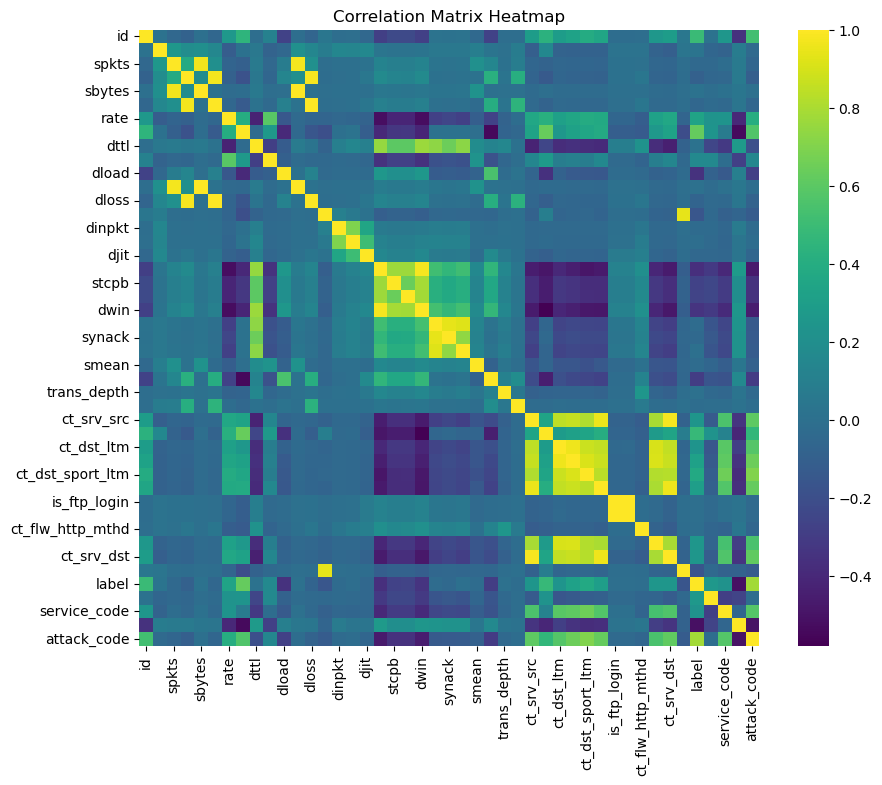

In [89]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='viridis')
plt.title('Correlation Matrix Heatmap')
plt.show()

MODELS

In [98]:
import gym
from gym import spaces
import numpy as np
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer


Combined dataset 

In [109]:
p = df1[['dur', 'proto_code', 'service_code', 'state_code', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports','label']]
n = df1['attack_code']
l = df1[['dur', 'proto_code', 'service_code', 'state_code', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports']]
m = df1['attack_code']

In [92]:
df1.shape

(257673, 45)

In [93]:
X1_train, X1_test, y1_train, y1_test = train_test_split(p, n, test_size=0.1, random_state=42)

In [110]:
X2_train, X2_test, y2_train, y2_test = train_test_split(l, m, test_size=0.1, random_state=42)

In [94]:
model1 = RandomForestClassifier()

In [95]:
model1.fit(X1_train, y1_train)

RandomForestClassifier()

In [96]:
y1_pred = model1.predict(X1_test)

In [97]:
accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8734864948773673


In [101]:
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X1_train_scaled, y1_train)

y_pred = rf_model.predict(X1_test_scaled)

accuracy = accuracy_score(y1_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y1_test, y_pred))

Accuracy: 87.45%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9359
           1       0.93      0.77      0.84      1403
           2       0.81      0.08      0.15       250
           3       0.33      0.24      0.28      1664
           4       0.64      0.82      0.72      4435
           5       0.88      0.24      0.37       238
           6       0.90      0.88      0.89      2340
           7       0.27      0.23      0.25        13
           8       0.70      0.66      0.68       158
           9       1.00      0.98      0.99      5908

    accuracy                           0.87     25768
   macro avg       0.74      0.59      0.62     25768
weighted avg       0.88      0.87      0.87     25768



In [107]:
X1_test.columns

Index(['dur', 'proto_code', 'service_code', 'state_code', 'spkts', 'dpkts',
       'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss',
       'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb',
       'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

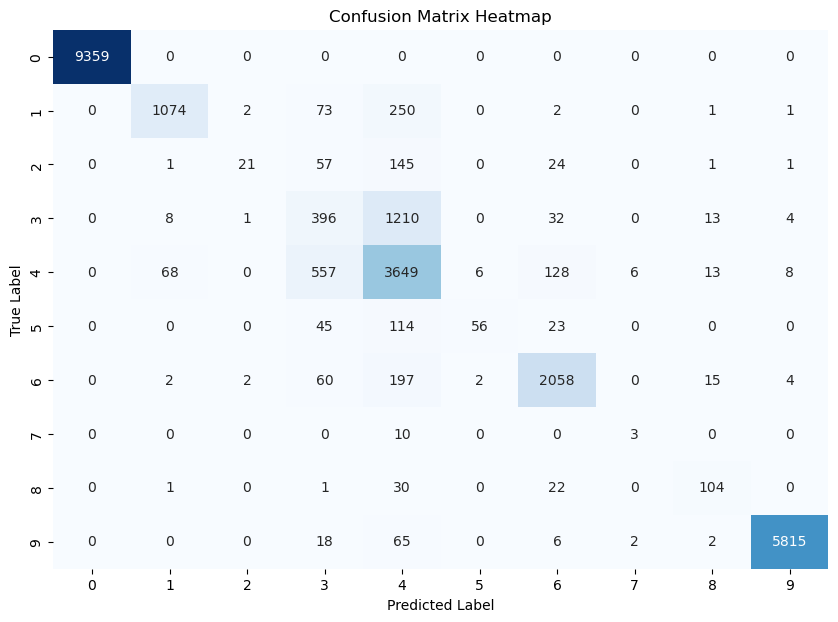

In [104]:
conf_matrix = confusion_matrix(y1_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')

plt.show()

In [112]:
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X1_train)
X2_test_scaled = scaler.transform(X1_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X2_train_scaled, y2_train)

y_pred = rf_model.predict(X2_test_scaled)

accuracy = accuracy_score(y2_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y2_test, y_pred))

Accuracy: 87.45%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9359
           1       0.93      0.77      0.84      1403
           2       0.81      0.08      0.15       250
           3       0.33      0.24      0.28      1664
           4       0.64      0.82      0.72      4435
           5       0.88      0.24      0.37       238
           6       0.90      0.88      0.89      2340
           7       0.27      0.23      0.25        13
           8       0.70      0.66      0.68       158
           9       1.00      0.98      0.99      5908

    accuracy                           0.87     25768
   macro avg       0.74      0.59      0.62     25768
weighted avg       0.88      0.87      0.87     25768



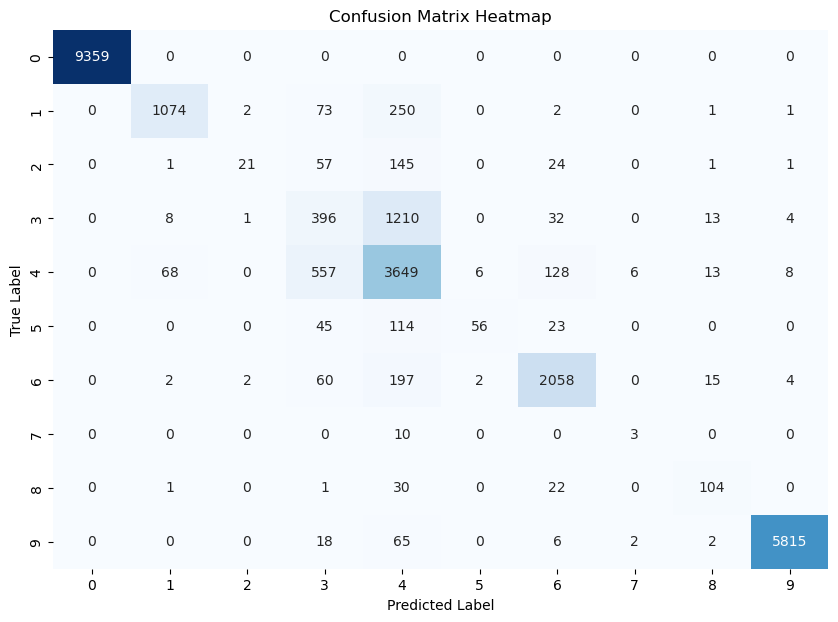

In [113]:
conf_matrix = confusion_matrix(y2_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')

plt.show()

In [115]:
X2_test.columns

Index(['dur', 'proto_code', 'service_code', 'state_code', 'spkts', 'dpkts',
       'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss',
       'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb',
       'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')

In [105]:
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

print("Scaler and model have been saved successfully.")

Scaler and model have been saved successfully.


XGBOOST

In [69]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X1_train_scaled, y1_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X1_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y1_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")
print("Classification Report:")
print(classification_report(y1_test, y_pred_xgb))

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:46:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 83.76%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      9359
           1       0.92      0.77      0.84      1403
           2       0.87      0.08      0.15       250
           3       0.48      0.10      0.17      1664
           4       0.62      0.91      0.74      4435
           5       0.96      0.10      0.18       238
           6       0.72      0.61      0.66      2340
           7       0.50      0.46      0.48        13
           8       0.68      0.72      0.70       158
           9       1.00      0.99      0.99      5908

    accuracy                           0.84     25768
   macro avg       0.77      0.57      0.58     25768
weighted avg       0.84      0.84      0.82     25768



MLPClassifier

In [70]:
imputer = SimpleImputer(strategy='mean')
X1_train_clean = imputer.fit_transform(X1_train)
X1_test_clean = imputer.transform(X1_test)

# Scale the data
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train_clean)
X1_test_scaled = scaler.transform(X1_test_clean)

# Initialize the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)

# Train the MLP model
mlp_model.fit(X1_train_scaled, y1_train)

# Make predictions on the test set
y_pred_mlp = mlp_model.predict(X1_test_scaled)

# Evaluate the model
accuracy_mlp = accuracy_score(y1_test, y_pred_mlp)
print(f"MLP Accuracy: {accuracy_mlp * 100:.2f}%")
print("Classification Report:")
print(classification_report(y1_test, y_pred_mlp))

MLP Accuracy: 83.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      9359
           1       0.93      0.74      0.82      1403
           2       0.74      0.06      0.10       250
           3       0.51      0.09      0.16      1664
           4       0.61      0.93      0.74      4435
           5       0.74      0.06      0.11       238
           6       0.72      0.57      0.63      2340
           7       0.25      0.08      0.12        13
           8       0.63      0.66      0.65       158
           9       0.99      0.98      0.99      5908

    accuracy                           0.83     25768
   macro avg       0.70      0.51      0.52     25768
weighted avg       0.83      0.83      0.81     25768



/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
